In [39]:
# import modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

%qtconsole

In [40]:
data_raw_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\data\\raw\\'
data_interim_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\data\\interim\\'
data_processed_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\data\\processed\\'
docs_img_dir = 'C:\\Users\\bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\docs\\img\\'

In [41]:
df_train_val = pd.read_csv(data_raw_dir + 'training_values.csv')
df_test_val = pd.read_csv(data_raw_dir + 'test_values.csv')
df_train_lab = pd.read_csv(data_raw_dir + 'training_labels.csv')

df_comp_val = pd.read_csv(data_interim_dir + 'comp_data_clean_impv2_geo-corr.csv')

C:\Users\bryan\Anaconda3\envs\kerascpu\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
df_comp_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   gps_height             74250 non-null  int64  
 3   installer              74250 non-null  object 
 4   longitude              74250 non-null  float64
 5   latitude               74250 non-null  float64
 6   basin                  74250 non-null  object 
 7   region                 74250 non-null  object 
 8   district_code          74250 non-null  int64  
 9   population             74250 non-null  int64  
 10  public_meeting         74250 non-null  int64  
 11  permit                 74250 non-null  int64  
 12  extraction_type_class  74250 non-null  object 
 13  management             74250 non-null  object 
 14  payment_type           74250 non-null  object 
 15  wa

Need to encode all object and categorical values.

### amount_tsh

In [43]:
var = 'amount_tsh'

df_comp_val[var].value_counts()

0.0       52049
500.0      3874
50.0       3103
1000.0     1858
20.0       1812
          ...  
5400.0        1
59.0          1
12.0          1
220.0         1
2550.0        1
Name: amount_tsh, Length: 102, dtype: int64

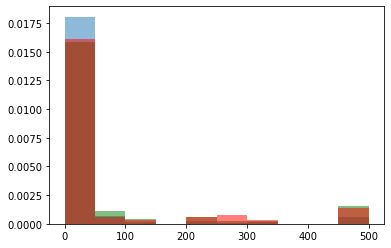

In [44]:
plt.figure()

plt.hist(df_comp_val[df_comp_val['status_group']=='non functional'][var],alpha=0.5,density=True,range=[0,500]);
plt.hist(df_comp_val[df_comp_val['status_group']=='functional'][var],color='green',alpha=0.5,density=True,range=[0,500]);
plt.hist(df_comp_val[df_comp_val['status_group']=='functional needs repair'][var],color='red',alpha=0.5,density=True,range=[0,500]);


### gps_height

In [45]:
var = 'gps_height'
var_red = var+'_reduced'

df_comp_val[var].value_counts()

 0       25649
-16         71
-15         69
-13         68
-19         65
         ...  
 2457        1
 2091        1
 2536        1
 2408        1
 2015        1
Name: gps_height, Length: 2456, dtype: int64

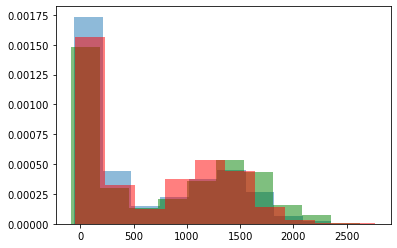

In [46]:
plt.figure()

plt.hist(df_comp_val[df_comp_val['status_group']=='non functional'][var],alpha=0.5,density=True);
plt.hist(df_comp_val[df_comp_val['status_group']=='functional'][var],color='green',alpha=0.5,density=True);
plt.hist(df_comp_val[df_comp_val['status_group']=='functional needs repair'][var],color='red',alpha=0.5,density=True);

### installer

In [47]:
var = 'installer'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[8:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

DWE           21751
unknown        4533
Government     2282
RWE            1498
Commu          1347
DANIDA         1305
KKKT           1120
Hesawa         1070
Name: installer, dtype: int64

In [48]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

other         39344
DWE           21751
unknown        4533
Government     2282
RWE            1498
Commu          1347
DANIDA         1305
KKKT           1120
Hesawa         1070
Name: installer_reduced, dtype: int64

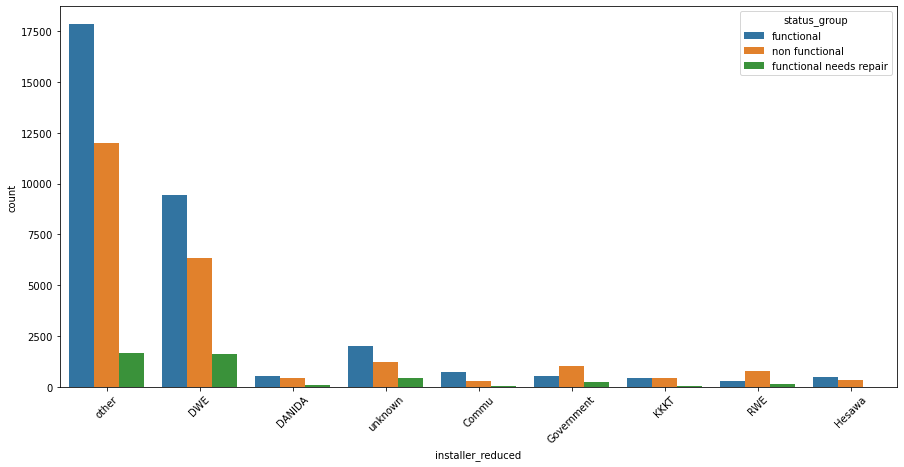

In [49]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [50]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [51]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### basin

In [52]:
var = 'basin'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[5:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

Lake Victoria      12871
Pangani            11143
Rufiji              9987
Internal            9642
Lake Tanganyika     8052
Name: basin, dtype: int64

In [53]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

other              22555
Lake Victoria      12871
Pangani            11143
Rufiji              9987
Internal            9642
Lake Tanganyika     8052
Name: basin_reduced, dtype: int64

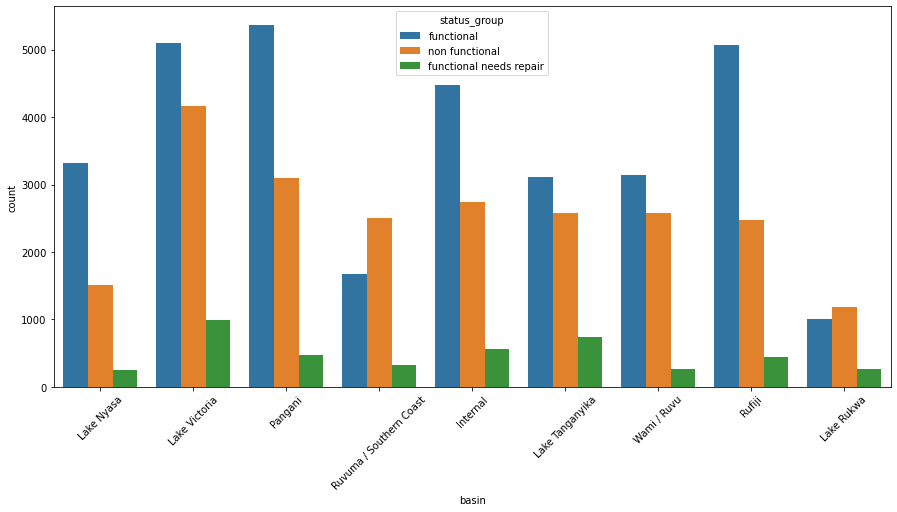

In [54]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var,hue='status_group')
plt.xticks(rotation=45);

In [55]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var],prefix=var)],axis=1)

In [56]:
df_comp_val = df_comp_val.drop(labels=[var],axis=1)

### region

In [57]:
var = 'region'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[5:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

Kilimanjaro    5503
Morogoro       5073
Njombe         4574
Arusha         4096
Mbeya          4056
Name: region, dtype: int64

In [58]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

other          50948
Kilimanjaro     5503
Morogoro        5073
Njombe          4574
Arusha          4096
Mbeya           4056
Name: region_reduced, dtype: int64

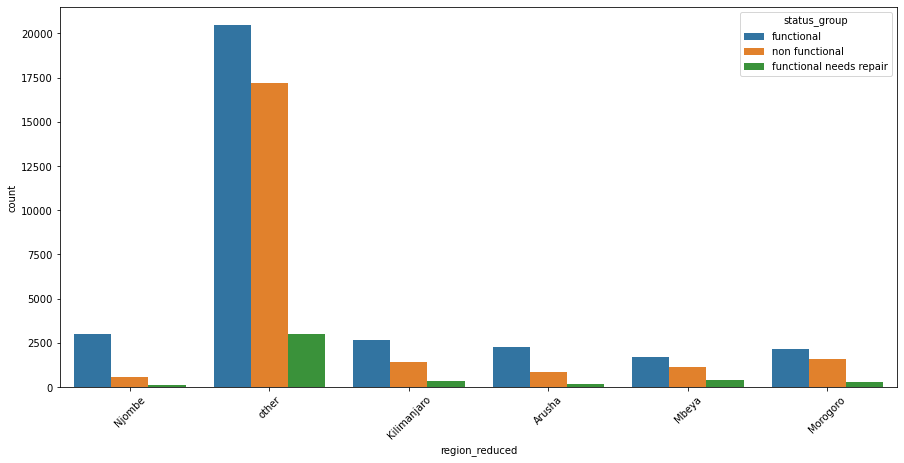

In [59]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [60]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [61]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

## population

<AxesSubplot:>

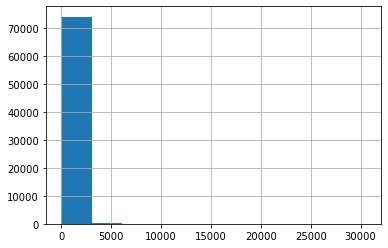

In [62]:
var = 'population'

df_comp_val[var].hist()

In [63]:
df_comp_val[var+'_bin'] = pd.qcut(df_comp_val[var],4,duplicates='drop').astype(str)

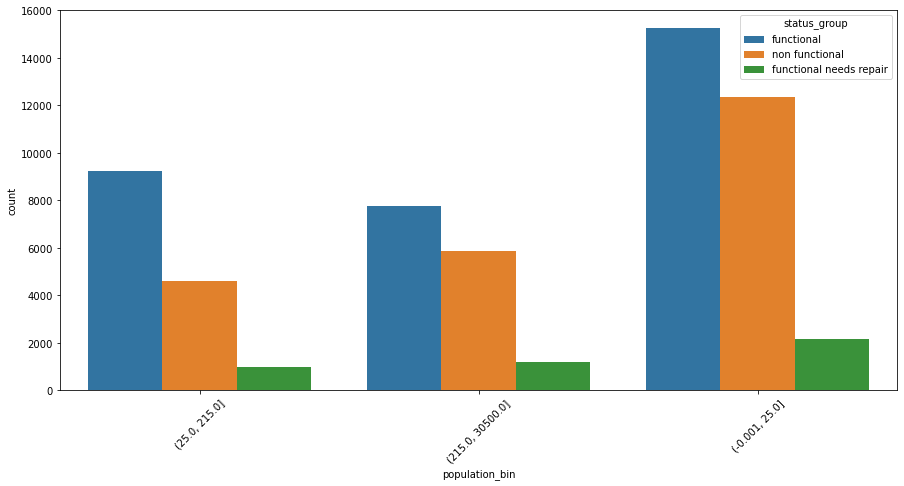

In [64]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var+'_bin',hue='status_group')
plt.xticks(rotation=45);

In [65]:
#df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var+'_bin'],prefix=var)],axis=1)
df_comp_val = df_comp_val.drop(labels=[var+'_bin'],axis=1)

### extraction_type_class

In [66]:
var = 'extraction_type_class'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[5:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

gravity        33263
handpump       20612
other           8102
submersible     7772
motorpump       3777
Name: extraction_type_class, dtype: int64

In [67]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

gravity        33263
handpump       20612
other           8826
submersible     7772
motorpump       3777
Name: extraction_type_class_reduced, dtype: int64

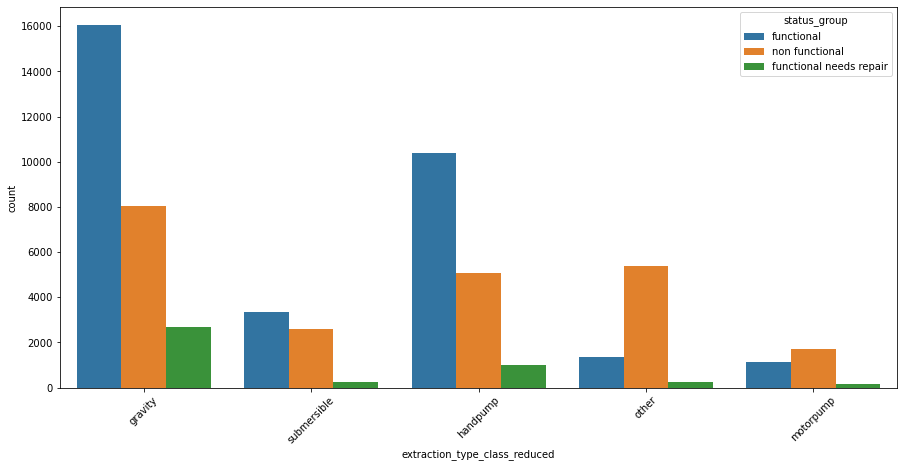

In [68]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [69]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var],prefix=var)],axis=1)

In [70]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### management

In [71]:
var = 'management'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[6:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

vwc                 50624
wug                  8108
water board          3688
wua                  3118
private operator     2504
parastatal           2229
Name: management, dtype: int64

In [72]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

vwc                 50624
wug                  8108
other                3979
water board          3688
wua                  3118
private operator     2504
parastatal           2229
Name: management_reduced, dtype: int64

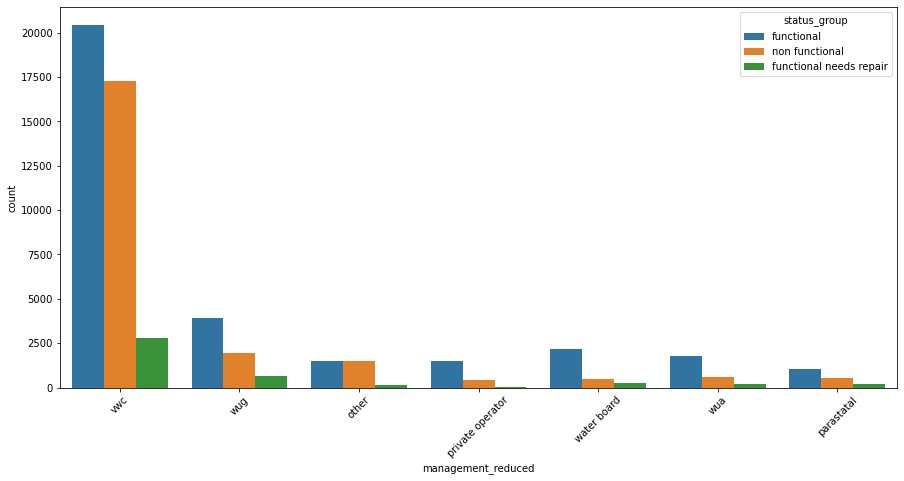

In [73]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [74]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [75]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### payment_type

In [76]:
var = 'payment_type'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[6:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

never pay     31712
per bucket    11266
monthly       10397
unknown       10149
on failure     4842
annually       4570
Name: payment_type, dtype: int64

In [77]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

never pay     31712
per bucket    11266
monthly       10397
unknown       10149
on failure     4842
annually       4570
other          1314
Name: payment_type_reduced, dtype: int64

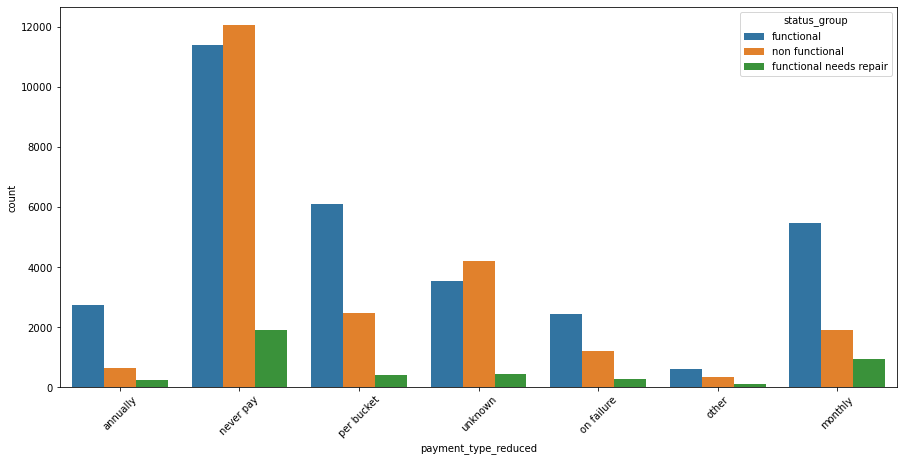

In [78]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [79]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [80]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### water_quality

In [81]:
var = 'water_quality'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[3:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

soft       63505
salty       6082
unknown     2345
Name: water_quality, dtype: int64

In [82]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

soft       63505
salty       6082
unknown     2345
other       2318
Name: water_quality_reduced, dtype: int64

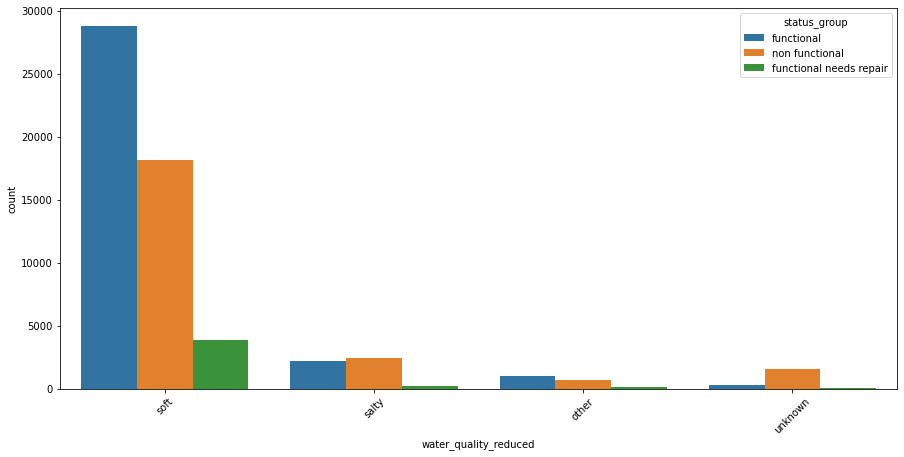

In [83]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [84]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [85]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### quantity

In [86]:
var = 'quantity'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[4:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

enough          41522
insufficient    18896
dry              7782
seasonal         5075
Name: quantity, dtype: int64

In [87]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

enough          41522
insufficient    18896
dry              7782
seasonal         5075
other             975
Name: quantity_reduced, dtype: int64

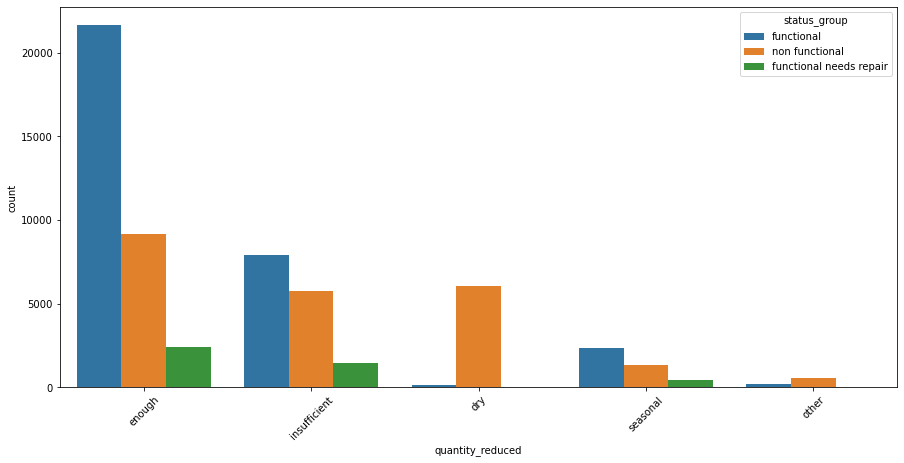

In [88]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [89]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [90]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### source

In [91]:
var = 'source'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[5:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

spring                  21216
shallow well            21140
machine dbh             13822
river                   11964
rainwater harvesting     2863
Name: source, dtype: int64

In [92]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

spring                  21216
shallow well            21140
machine dbh             13822
river                   11964
other                    3245
rainwater harvesting     2863
Name: source_reduced, dtype: int64

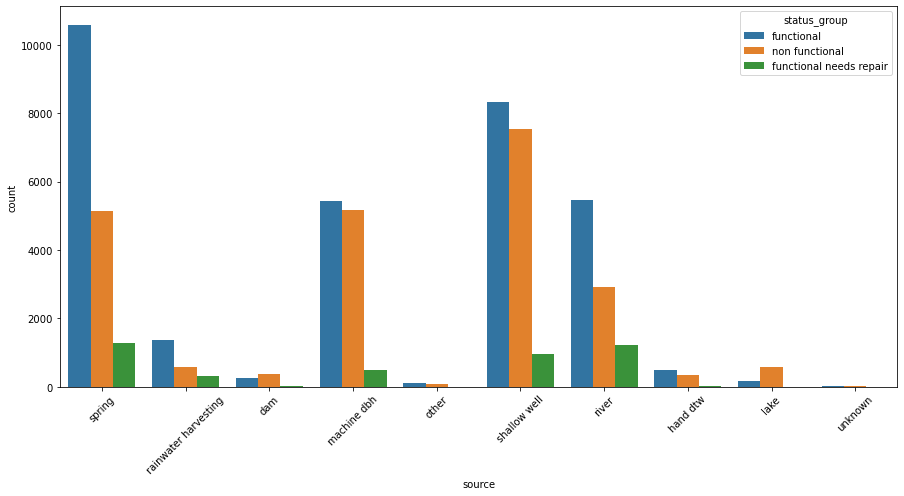

In [93]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var,hue='status_group')
plt.xticks(rotation=45);

In [94]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### source_class

In [95]:
var = 'source_class'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[2:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

groundwater    57286
surface        16617
Name: source_class, dtype: int64

In [96]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

groundwater    57286
surface        16617
other            347
Name: source_class_reduced, dtype: int64

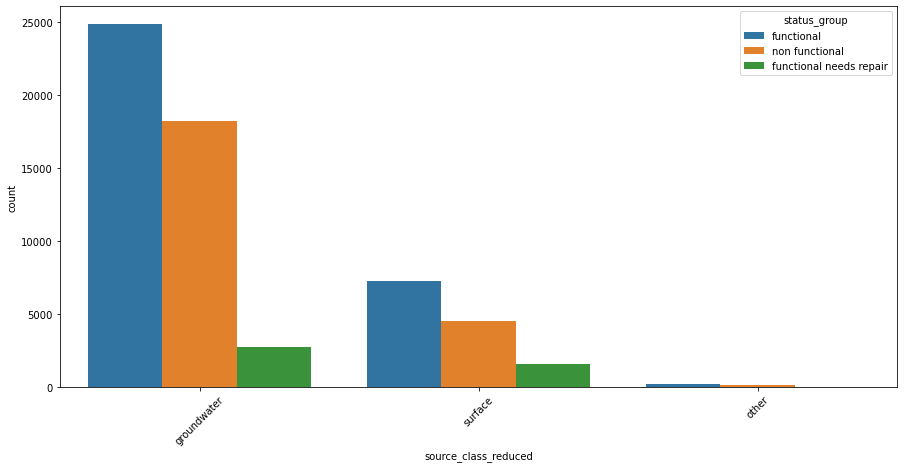

In [97]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [98]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [99]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### waterpoint_type

In [100]:
var = 'waterpoint_type'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[4:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

communal standpipe             35628
hand pump                      21884
other                           8010
communal standpipe multiple     7611
Name: waterpoint_type, dtype: int64

In [101]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

communal standpipe             35628
hand pump                      21884
other                           9127
communal standpipe multiple     7611
Name: waterpoint_type_reduced, dtype: int64

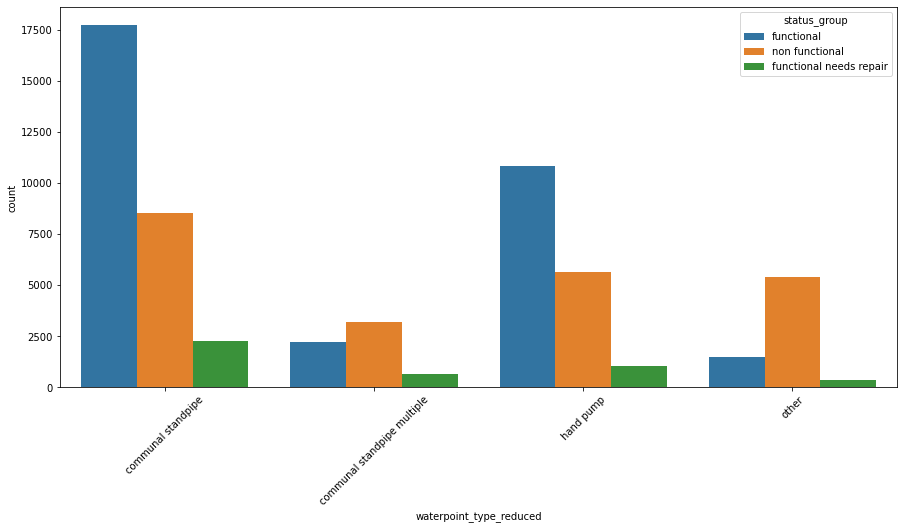

In [102]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [103]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [104]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### pump_age

In [105]:
var = 'pump_age'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[df_comp_val[var].value_counts().index < 0]
df_comp_val[var].value_counts()[df_comp_val[var].value_counts().index <= 10]

 3.0     3390
 1.0     2903
 2.0     2723
 5.0     2490
 4.0     2324
 7.0     1809
 6.0     1732
 8.0     1440
 10.0    1060
 9.0     1006
 0.0      729
-4.0        3
-5.0        3
-2.0        2
-7.0        2
-3.0        1
-1.0        1
Name: pump_age, dtype: int64

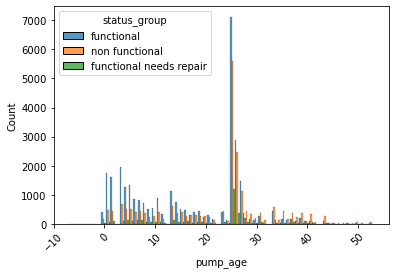

In [106]:
sns.histplot(data=df_comp_val,x=var,hue='status_group',multiple='dodge')
plt.xticks(rotation=45);

In [107]:
q20 = df_comp_val[var].quantile(0.2)
q40 = df_comp_val[var].quantile(0.4)
q60 = df_comp_val[var].quantile(0.6)
q80 = df_comp_val[var].quantile(0.8)
q100 = df_comp_val[var].quantile(1)

df_comp_val[var+'_bin'] = pd.cut(df_comp_val[var],bins=[0,q20,q40,q60,q80,q100],labels=['0-20','20-40','40-60','60-80','80-100']).astype(str)

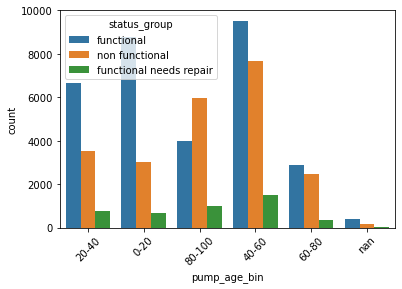

In [108]:
sns.countplot(data=df_comp_val,x=var+'_bin',hue='status_group')
plt.xticks(rotation=45);

In [109]:
df_comp_val = df_comp_val.drop(labels=[var+'_bin'],axis=1)

## Feature Review

In [112]:
df_comp_val.iloc[:3,11:20]

,installer_Commu,installer_DANIDA,installer_DWE,installer_Government,installer_Hesawa,installer_KKKT,installer_RWE,installer_other,installer_unknown
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0


In [73]:
df_comp_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 66 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   id                                           74250 non-null  int64  
 1   amount_tsh                                   74250 non-null  float64
 2   gps_height                                   74250 non-null  int64  
 3   longitude                                    74250 non-null  float64
 4   latitude                                     74250 non-null  float64
 5   district_code                                74250 non-null  int64  
 6   population                                   74250 non-null  int64  
 7   public_meeting                               74250 non-null  int64  
 8   permit                                       74250 non-null  int64  
 9   pump_age                                     74250 non-null  float64
 10

In [74]:
train_index = df_train_val.id.tolist()
test_index = df_test_val.id.tolist()

df_train_val_new = df_comp_val[df_comp_val.id.isin(train_index)]


df_train_val_new.to_csv(data_processed_dir+'training_data_encoded_impv2_geo-corr.csv',index=False)

df_test_val_new = df_comp_val[df_comp_val.id.isin(test_index)]
df_test_val_new.to_csv(data_processed_dir+'test_data_encoded_impv2_geo-corr.csv',index=False)